# Rachel Ward
## DAV 5400 - Week 6 Assignment

This assignment looks at prices and other attributes of nearly 54,000 diamonds. A description of the attributes contained within the data set can be found [here:](https://ggplot2.tidyverse.org/reference/diamonds.html)
First I will load the data file from Canvas into my GitHub repository and then I will read the
data from the GitHub repository into a Pandas dataframe. 


In [1]:
# First import pandas
import pandas as pd

#Next import numpy
import numpy as np

#Then read the file into a dataframe called diamonds
diamonds = pd.read_csv('https://raw.githubusercontent.com/rachelward617/DAV-5400/9ddbbaf9f2fa2422c98cccf27bda20366967f2d4/diamonds.csv')

#use the head function to make sure the data loaded properly
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Question 1: What proportion of diamonds are between .30 and 1.08 carats?

To answer this question I will first check to see if there are any null values. Then I will count the number of rows that have a carat value between 0.30 and 1.08, count the total number of diamonds, and calculate the proportion.

In [2]:
#use the isnull function and sum to see if there are any null values in the data set.
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [3]:
#Since there are no null values, use boolean logic and the count function to see how many rows have a carat value between 0.30 and 1.08
numofcriteria= diamonds[(diamonds.carat >= 0.30) & (diamonds.carat <= 1.08)].count()['carat']

#Print the number of diamonds that fit the criteria
print("The number of diamonds that are between 0.30 and 1.08 carats is", numofcriteria)

#count the total number of diamonds 
totalnum = diamonds.count()['carat']

#print the results
print("The total number of diamonds is:",totalnum)

#calculate the proportion
proportion = numofcriteria/totalnum

#print the results
print("The proportion of diamonds between 0.30 and 1.08 is", proportion)

The number of diamonds that are between 0.30 and 1.08 carats is 40284
The total number of diamonds is: 53940
The proportion of diamonds between 0.30 and 1.08 is 0.7468298109010011


### Question 2: How many of the diamonds have equal x and y dimensions?

We know from earlier that there are no NULL values so we can use boolean logic and the count function to count only the rows where the x and y dimensions are equal. 


In [4]:
#Use boolean logic and the count function to count only the rows where the x and y values are the same. 
#So that only one result is generated I sliced the answer by one column, carat, but I could have chosen any.

diamonds[diamonds.x == diamonds.y].count()['carat']

17

### Question 3: How many of the diamonds have a carat less than the mean carat value?

We know there are no NULL values present. So, I can slice the data using boolean logic and then use the mean and count functions built into pandas to get the count of rows where the carat is less than the mean.


In [5]:
#use boolean logic to first get the rows where the carat is less than the mean, then count those rows.
diamonds[diamonds.carat < diamonds['carat'].mean()].count()['carat']

31127

### Question 4: How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

To answer this I will slice the data frame using boolean logic and then count the number of rows that fit these criteria using the count function in pandas.

In [6]:
#Use boolean OR logic to count how many diamonds are premium or ideal.
diamonds[(diamonds.cut == 'Premium') | (diamonds.cut == 'Ideal')].count()['cut']

35342

### Question 5: Which diamond has the highest price per carat? What is its value?

To answer this I will first create a new, calculated column in the diamonds data frame called "ppc" or price per carat.
To do this I will divide price by carat for each row. 
Next I will get the index number of the diamond with the highest price per carat. 
Last, I will return the max value of the highest price per carat.


In [7]:
#create new calculated column for price per carat by dividing price by carat
diamonds['ppc'] = diamonds['price']/diamonds['carat']

#get the index value for the diamond with the highest price per carat.
indexmax = diamonds['ppc'].idxmax()

#print the index value
print("The index of the diamond with the highest price per carat is", indexmax)

#get the highest price per carat
maxvalue = diamonds['ppc'].max()

#print results
print("The highest price per carat is", maxvalue)

The index of the diamond with the highest price per carat is 27635
The highest price per carat is 17828.846153846152


### Question 6: Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?

To answer this I will use the .plot function in pandas with 'bar' as the type of graph. In order to get the frequency of the cut, I will use the .value_counts function paired with the cut to get the appropriate graph.

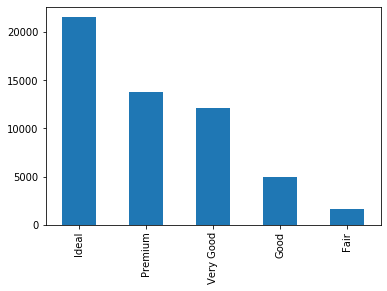

In [9]:
#create a bar chart fore frequency of cut using .value_counts and plot functions in pandas
cutbar = diamonds['cut'].value_counts().plot(kind='bar')

#show the results nicely
cutbar;

**Results:** The above frequency bar chart tells us that the most common cut value in this data set is "Ideal" with over 20,000 diamonds having this cut. From above we know that there is a total of 53,940 diamonds in the data set. This means that over 35% of the diamonds in this dataset have the cut value of "Ideal." Furthermore we see that the cut value that is least common is "Fair." There are less than 5,000 diamonds in the data set with a "fair" cut value. 
Also, we know from above that 35,342 diamonds had a cut value of either "Premium" or "Ideal" which are the two highest ranked cut values. This graph further illustrates that premium and ideal are the two most common cut values and together make up roughly 65% of the entire dataset.

### Question 7: Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots

To do this I will use the .boxplot built in pandas function by cut using the column price.

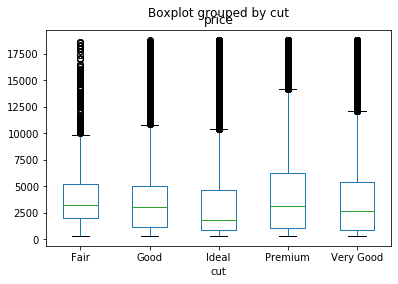

In [10]:
#use the .boxplot function to create boxplots for each cut by price.
pricecutbox = diamonds.boxplot(by='cut', column = 'price', grid = False)

#show results
pricecutbox;

**Conclusions:** The boxplots all seem to have a similar range (minimum to maximum) and each cut appears to have many outliers. 
Interestingly, the cut "ideal", which we learned above is the highest ranking cut value, has the lowest median, while fair, good, and premium cuts seem to have very similar median values. The premium cut has the largest interquartile range, while the fair cut has the shortest interquartile range. The distribution for each cut appears to be skewed to the right. 

After looking at the boxplots, and looking at the data, I do not think price vs cut is the most helpful analysis to perform, as the carat amount involved will change the results substantially. For example, a very small "ideal" cut diamond likely costs a similar amount to a much larger "fair" cut diamond. I would recommend looking at price per carat by cut rather than just price for a more helpful analysis.

### Question 8: Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

For each of these I will first use the .plot function in pandas using the histogram kind in order to get the histogram for each of the above variables.

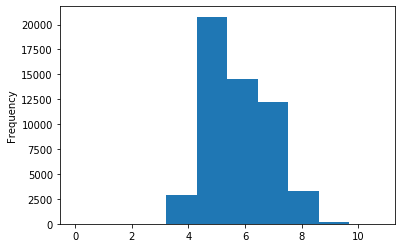

In [11]:
#use the .plot function with histogram kind to generate the histogram for length, which is column 'x'.
lengthhist = diamonds['x'].plot(kind='hist')

#show results
lengthhist;

**Conclusions:** For length, the distribution seems to be centered around 5mm and appears to be slightly skewed to the right. The range of possible values is fairly small, with the maximum appearing to be close to 10mm.

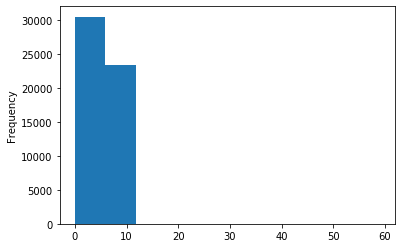

In [12]:
#Use the .plot function with histogram kind to generate the histogram for width which is column 'y'
widthhist = diamonds['y'].plot(kind = 'hist')

#show results
widthhist;

**Conclusions:** The histogram of width shows that the distribution is tightly grouped together between 0 and 10mm, with some possible outliers higher than 10mm given the range of the histogram going up to 60mm. 

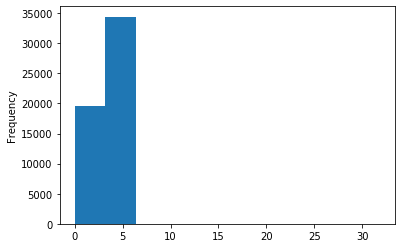

In [13]:
#use the .plot function to plot depth which is column z. 
depthhist = diamonds['z'].plot(kind = 'hist')

#show results
depthhist;

**Conclusions:** The distribution of depth is highly concentrated and centered near 5mm. There appear to be a few outliers due to the histogram going up to 30. 

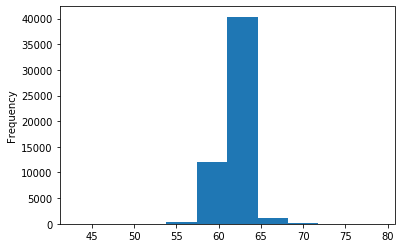

In [14]:
#use .plot to plot the histogram for total depth.
totaldepthhist = diamonds['depth'].plot(kind = 'hist')

#show results
totaldepthhist;

**Conclusions:** The distribution of depth percentage seems to be centered between 60 and 65 percent. The range goes from below 45% to about 80%.

### Question 9: Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

To accomplish this I will use the .scatter function from pandas to create the scatter plot between carat and price.

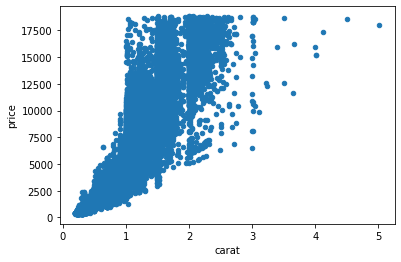

In [15]:
#use .scatter to create a scatter plot with carat on the x axis and price on the y axis.
scatter = diamonds.plot.scatter(x='carat',y='price')

#show results
scatter;

**Conclusions:** There is a positive relationship between carat and price. There appear to be a few outliers towards 5 carats.